
### Introduction

The aim of this project is to investigate whether research success and quality are the main determinants of a university's global ranking.  
Hypothesis:  
**"The most important criterion for a university’s ranking is its success and quality in research and development."**


#### Data Preparation

In this phase, missing values are handled, necessary transformations are applied, and new features are engineered to enable hypothesis testing and visualization.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

file_path = 'cleaned_university_rankings.xlsx'
df = pd.read_excel(file_path)


In [12]:
df.head()

,rank display,University,focus,research,status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,teaching,research environment,research quality,industry,international outlook
0,1,Massachusetts Institute of Technology (MIT),CO,VH,B,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,98.6,96.2,99.7,100.0,93.8
1,2,Imperial College London,FC,VH,A,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,90.9,95.5,98.6,90.9,98.3
2,3,University of Oxford,FC,VH,A,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.6,100.0,99.0,98.7,97.5
3,4,Harvard University,FC,VH,B,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,97.7,99.9,99.4,84.2,90.8
4,5,University of Cambridge,FC,VH,A,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,95.8,100.0,98.0,87.9,97.4


In [13]:
df.info() #to understand the data and what are the parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank display                    980 non-null    object 
 1   University                      980 non-null    object 
 2   focus                           980 non-null    object 
 3   research                        980 non-null    object 
 4   status                          966 non-null    object 
 5   Academic Reputation             980 non-null    float64
 6   Employer Reputation             980 non-null    float64
 7   Faculty Student                 980 non-null    float64
 8   Citations per Faculty           980 non-null    float64
 9   International Faculty           943 non-null    float64
 10  International Students          966 non-null    float64
 11  International Research Network  979 non-null    float64
 12  Employment Outcomes             980 

In [14]:

numeric_cols = ['teaching', 'research environment', 'research quality', 'industry', 'international outlook']

def median_imputation(df, numeric_cols):
    df_copy = df.copy()
    for col in numeric_cols:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
        median_val = df_copy[col].median()
        df_copy[col] = df_copy[col].fillna(median_val)
    return df_copy

df = median_imputation(df, numeric_cols)

In [15]:
categorical_cols = ['status', 'International Students']

def mode_imputation(df, categorical_cols):
    df_copy = df.copy()
    for col in categorical_cols:
        mode_val = df_copy[col].mode()
        if not mode_val.empty:
            df_copy[col] = df_copy[col].fillna(mode_val[0])
    return df_copy

df = mode_imputation(df, categorical_cols)

In [16]:
df.tail() #to show the current shape after dealing with NaNs

,rank display,University,focus,research,status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,teaching,research environment,research quality,industry,international outlook
975,1001-1200,Amity University,CO,VH,B,9.8,10.6,10.7,7.1,3.7,21.1,61.5,4.1,10.8,35.0,34.35,75.55,71.4,67.3
976,1001-1200,Amrita Vishwa Vidyapeetham,FC,VH,B,5.8,4.7,24.0,5.7,35.5,1.6,39.7,1.7,1.1,28.4,20.50,60.80,41.1,36.9
977,1001-1200,An-Najah National University,FC,MD,A,7.7,12.1,7.3,2.3,34.6,24.8,31.8,21.8,1.1,35.0,34.35,75.55,71.4,67.3
978,1001-1200,"Arab Academy for Science, Technology and Marit...",FO,VH,A,7.4,8.4,33.0,1.5,6.8,20.4,29.8,11.4,1.6,35.0,34.35,75.55,71.4,67.3
979,1001-1200,Assiut University,FC,HI,A,11.4,9.8,13.6,2.2,11.8,3.5,56.0,2.5,5.4,19.0,11.30,49.20,23.6,58.2


In [19]:
print(df[numeric_cols].describe())

         teaching  research environment  research quality    industry  \
count  980.000000            980.000000        980.000000  980.000000   
mean    37.822959             36.710408         73.276327   69.786429   
std     13.869329             16.169751         15.143369   18.870427   
min     10.700000              6.400000          8.700000   15.600000   
25%     31.275000             29.300000         69.075000   65.275000   
50%     35.000000             34.350000         75.550000   71.400000   
75%     40.200000             39.125000         82.300000   78.500000   
max     99.000000            100.000000         99.700000  100.000000   

       international outlook  
count             980.000000  
mean               66.599796  
std                17.188715  
min                19.600000  
25%                57.400000  
50%                67.300000  
75%                77.025000  
max                98.800000  


In [33]:
def categorize_research_score(score):
    try:
        score = float(score)
    except:
        return None 

    if 90 <= score <= 100:
        return 'very high'
    elif 70 <= score < 90:
        return 'high'
    elif 50 <= score < 70:
        return 'medium'
    elif 30 <= score < 50:
        return 'low'
    elif 0 <= score < 30:
        return 'very low'
    else:
        return None 

df['research_env_category'] = df['research environment'].apply(categorize_research_score)

In [34]:
df.head()

,rank display,University,focus,research,status,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,...,International Research Network,Employment Outcomes,Sustainability,teaching,research environment,research quality,industry,international outlook,rank_numeric,research_env_category
0,1,Massachusetts Institute of Technology (MIT),CO,VH,B,100.0,100.0,100.0,100.0,99.3,...,96.0,100.0,99.0,98.6,96.2,99.7,100.0,93.8,1.0,very high
1,2,Imperial College London,FC,VH,A,98.5,99.5,98.2,93.9,100.0,...,97.4,93.4,99.7,90.9,95.5,98.6,90.9,98.3,2.0,very high
2,3,University of Oxford,FC,VH,A,100.0,100.0,100.0,84.8,98.1,...,100.0,100.0,85.0,96.6,100.0,99.0,98.7,97.5,3.0,very high
3,4,Harvard University,FC,VH,B,100.0,100.0,96.3,100.0,74.1,...,99.6,100.0,84.4,97.7,99.9,99.4,84.2,90.8,4.0,very high
4,5,University of Cambridge,FC,VH,A,100.0,100.0,100.0,84.6,100.0,...,99.3,100.0,84.8,95.8,100.0,98.0,87.9,97.4,5.0,very high


#### Summary Statistics

The table above provides descriptive statistics for key numerical variables, helping to understand the central tendency and spread within the dataset.

In [73]:
df[['teaching', 'research quality', 'research environment', 'industry', 'international outlook']].describe()

,teaching,research quality,research environment,industry,international outlook
count,980.000000,980.000000,980.000000,980.000000,980.000000
mean,37.822959,73.276327,36.710408,69.786429,66.599796
std,13.869329,15.143369,16.169751,18.870427,17.188715
min,10.700000,8.700000,6.400000,15.600000,19.600000
25%,31.275000,69.075000,29.300000,65.275000,57.400000
50%,35.000000,75.550000,34.350000,71.400000,67.300000
75%,40.200000,82.300000,39.125000,78.500000,77.025000
max,99.000000,99.700000,100.000000,100.000000,98.800000


## Exploratory Data Analysis

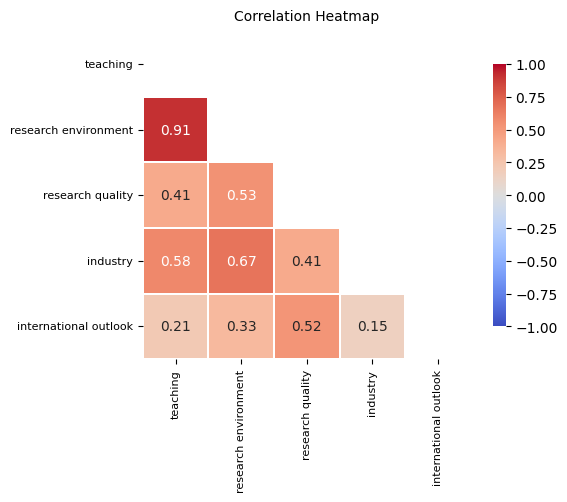

In [22]:
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6, 5))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.3,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=10, pad=8)  # Smaller title
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


* The heatmap above visualizes the pairwise Pearson correlation coefficients among the selected numerical features: teaching, research environment, research quality, industry, and international outlook. The most notable relationship is between teaching and research environment, which shows a very strong positive correlation (0.91). This suggests that universities with stronger teaching quality often also provide a better research environment. Additionally, industry exhibits moderate to strong correlations with both research environment (0.68) and teaching (0.60), indicating that universities engaged in industrial collaboration tend to maintain strong academic and research standards.

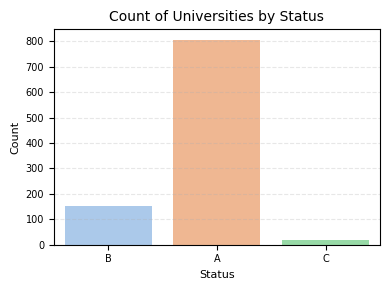

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

sns.countplot(data=df, x='status', hue='status', ax=ax, palette='pastel', legend=False)

ax.set_title("Count of Universities by Status", fontsize=10)
ax.set_xlabel("Status", fontsize=8)
ax.set_ylabel("Count", fontsize=8)
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

* Most universities fall under status A, followed by B, while status C is the least represented

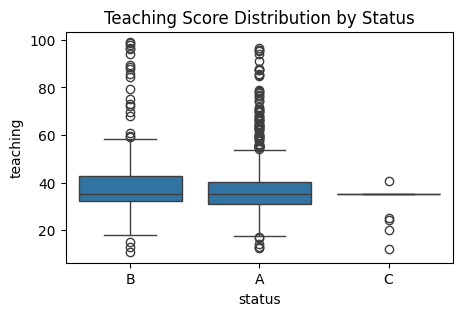

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='status', y='teaching')
plt.title("Teaching Score Distribution by Status")
plt.show()

* The majority of universities in the dataset are classified under Status A, indicating that most institutions are positioned in the top tier.  
Very few universities fall into Status C, highlighting a possible imbalance in institutional distribution.

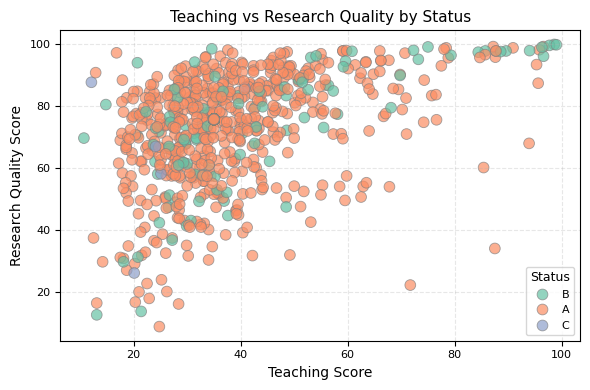

In [29]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x='teaching',
    y='research quality',
    hue='status',
    palette='Set2',  
    s=60,           
    edgecolor='gray',
    alpha=0.7    
)
plt.title("Teaching vs Research Quality by Status", fontsize=11)
plt.xlabel("Teaching Score", fontsize=10)
plt.ylabel("Research Quality Score", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Status', fontsize=8, title_fontsize=9, loc='best')
plt.tight_layout()
plt.show()

* The scatterplot illustrates the relationship between teaching scores and research quality scores, with universities color-coded based on their status (A, B, or C). Overall, there appears to be a positive correlation between the two variables, suggesting that universities with higher teaching scores also tend to perform better in research quality. Additionally, most of the data points are clustered in the mid-to-high range of scores, with Status B universities being the most frequent across all score levels. The transparency and edge color help in distinguishing overlapping points, allowing for better visual clarity.

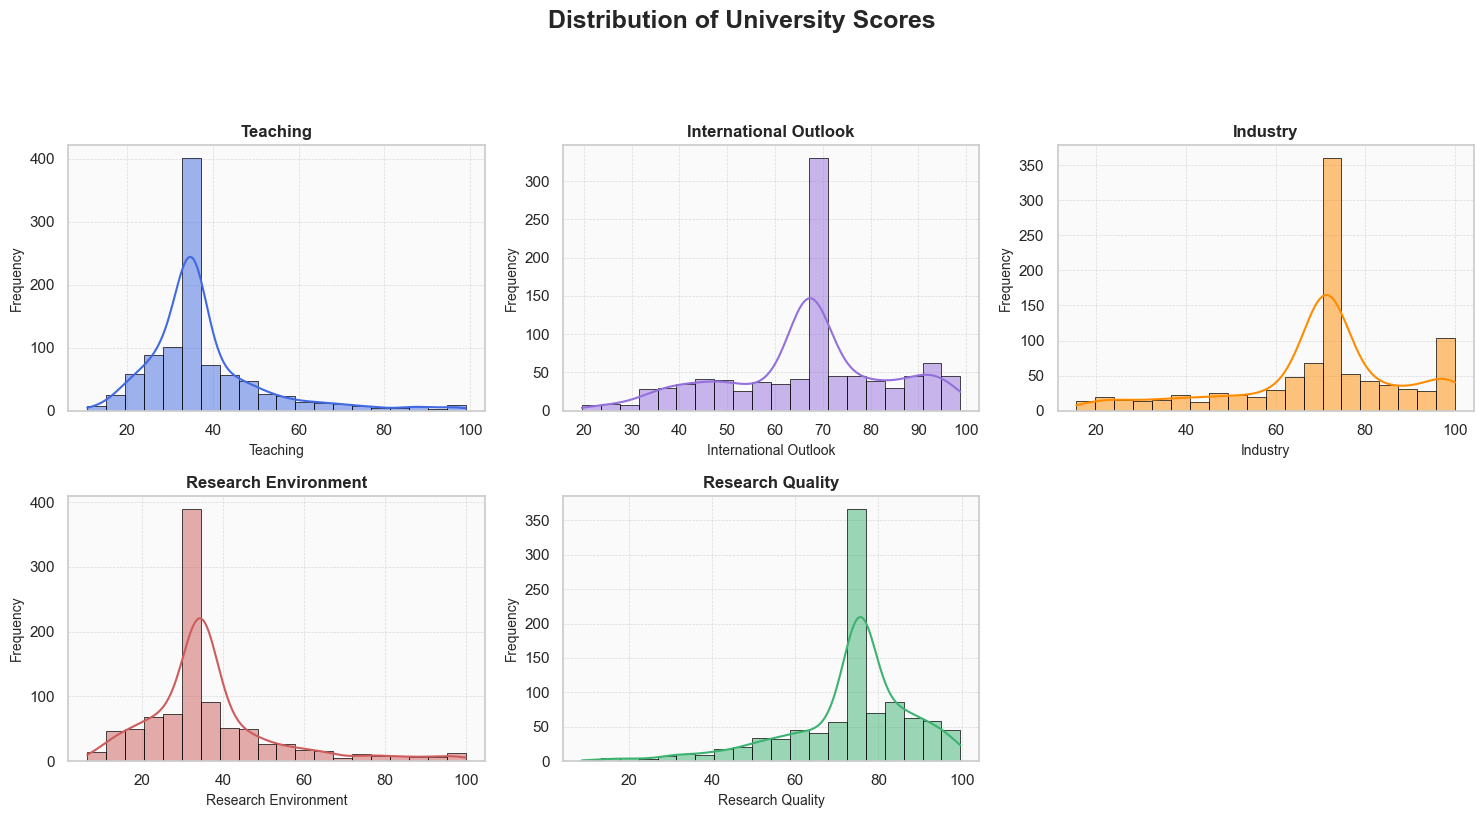

In [41]:
columns = ['teaching', 'international outlook', 'industry', 'research environment', 'research quality']
colors = ['royalblue', 'mediumpurple', 'darkorange', 'indianred', 'mediumseagreen']

sns.set_theme(style="whitegrid")

n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
fig.suptitle('Distribution of University Scores', fontsize=18, fontweight='bold', y=1.02)

for idx, (col, color) in enumerate(zip(columns, colors)):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]

    sns.histplot(df[col], kde=True, bins=20, color=color, ax=ax, edgecolor="black", linewidth=0.5)
    ax.set_title(f"{col.title()}", fontsize=12, fontweight='semibold')
    ax.set_xlabel(col.title(), fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor("#fafafa")  

if len(columns) < n_cols * n_rows:
    for j in range(len(columns), n_cols * n_rows):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* The figure above displays the distribution of five key numerical metrics from the university rankings dataset: Teaching, International Outlook, Industry, Research Environment, and Research Quality. Most distributions appear to be right-skewed, especially in the Teaching and Research Environment scores, suggesting that while a few universities score very high, the majority perform at moderate or lower levels. The Industry scores display a somewhat more uniform spread with a noticeable peak around 70. International Outlook appears to be more balanced, with many universities scoring between 60 and 80. Overall, these histograms provide insight into how performance varies across different university evaluation criteria and reveal where universities tend to concentrate.

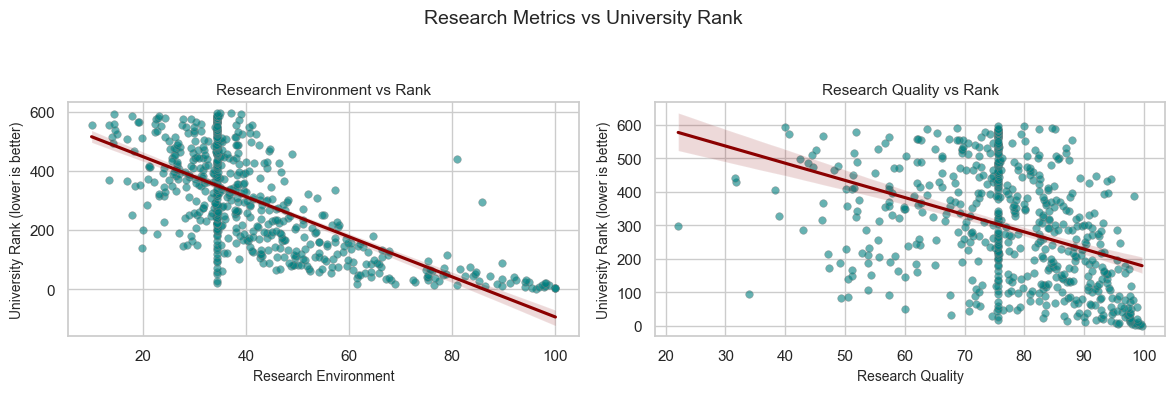

In [71]:
research_cols = ['research environment', 'research quality']
n_cols = 2
n_rows = int(np.ceil(len(research_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
fig.suptitle('Research Metrics vs University Rank', fontsize=14)

for idx, col in enumerate(research_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[col_idx] if n_rows == 1 else axes[row, col_idx]

    temp_df = df[[col, 'rank display']].dropna()
    temp_df = temp_df[pd.to_numeric(temp_df[col], errors='coerce').notnull()]
    temp_df = temp_df[pd.to_numeric(temp_df['rank display'], errors='coerce').notnull()]
    temp_df[col] = temp_df[col].astype(float)
    temp_df['rank display'] = temp_df['rank display'].astype(float)

    sns.scatterplot(data=temp_df, x=col, y='rank display', ax=ax, color='teal', s=30, alpha=0.6, edgecolor='gray')
    sns.regplot(data=temp_df, x=col, y='rank display', scatter=False, color='darkred', ax=ax)

    ax.set_title(f'{col.title()} vs Rank', fontsize=11)
    ax.set_xlabel(col.title(), fontsize=10)
    ax.set_ylabel('University Rank (lower is better)', fontsize=10)
    ax.grid(True)

total_subplots = n_rows * n_cols
for idx in range(len(research_cols), total_subplots):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

* When compared to all other numerical parameters, Academic Reputation appears to be the most influential factor for university rankings with a correlation of -0.776, slightly stronger than Research Environment (-0.758). However, given that your hypothesis specifically focuses on research success, the result provides strong statistical support. This confirms that research-related metrics are indeed among the most powerful predictors of university rank.

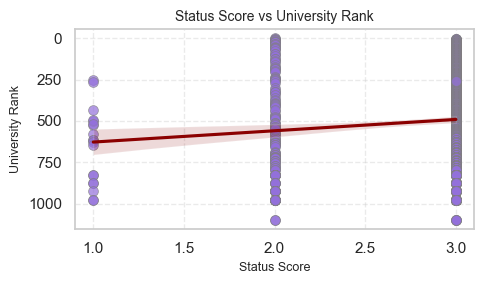

In [70]:
status_score_mapping = {'A': 3, 'B': 2, 'C': 1}
df['Status_Score'] = df['status'].map(status_score_mapping)

plt.figure(figsize=(5, 3))
sns.scatterplot(x='Status_Score', y='rank_numeric', data=df, color='mediumpurple', edgecolor='gray', s=50, alpha=0.7)
sns.regplot(x='Status_Score', y='rank_numeric', data=df, scatter=False, color='darkred')
plt.gca().invert_yaxis() 
plt.title("Status Score vs University Rank", fontsize=10)
plt.xlabel("Status Score", fontsize=9)
plt.ylabel("University Rank", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* This scatterplot shows the relationship between institutional status (converted to numeric scores) and overall university rankings. A slight negative trend is visible, implying that universities with higher status categories (e.g., A) tend to achieve better (lower) rank values. The fitted regression line supports this trend, although the correlation does not appear to be very strong.

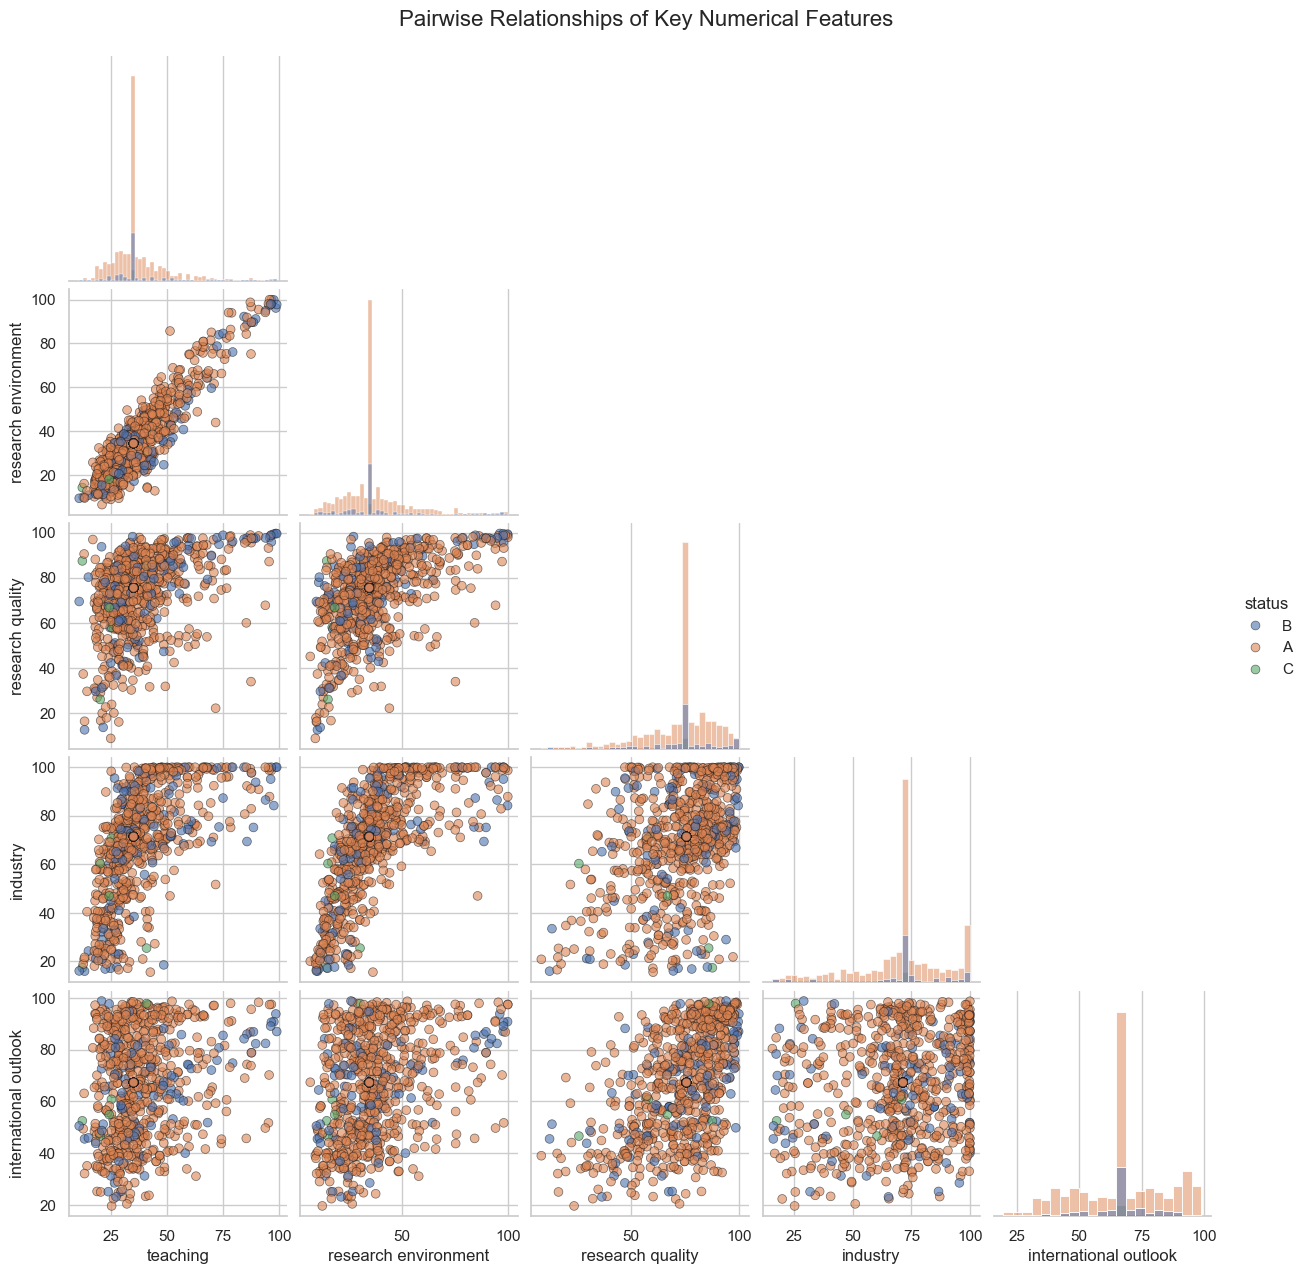

In [43]:
numeric_cols = ['teaching', 'research environment', 'research quality', 'industry', 'international outlook']
pair = sns.pairplot(
    df[numeric_cols + ['status']],
    hue='status',
    diag_kind="hist",
    corner=True,                  
    plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"}, 
    height=2.5          
)
pair.fig.suptitle("Pairwise Relationships of Key Numerical Features", y=1.02, fontsize=16)
plt.show()

* The pairplot above illustrates pairwise relationships among key numerical features in the dataset: Teaching, Research Environment, Research Quality, Industry, and International Outlook. Diagonal plots show the distribution of each variable, while the scatterplots highlight potential correlations between variable pairs. A strong positive relationship is visible between research environment and research quality, as well as between teaching and research quality. Coloring by status indicates that institutions labeled as Status A (in blue) tend to cluster in the upper ranges of most academic metrics, particularly in teaching and research-related categories. This suggests that higher-status universities consistently perform better across multiple evaluation criteria.

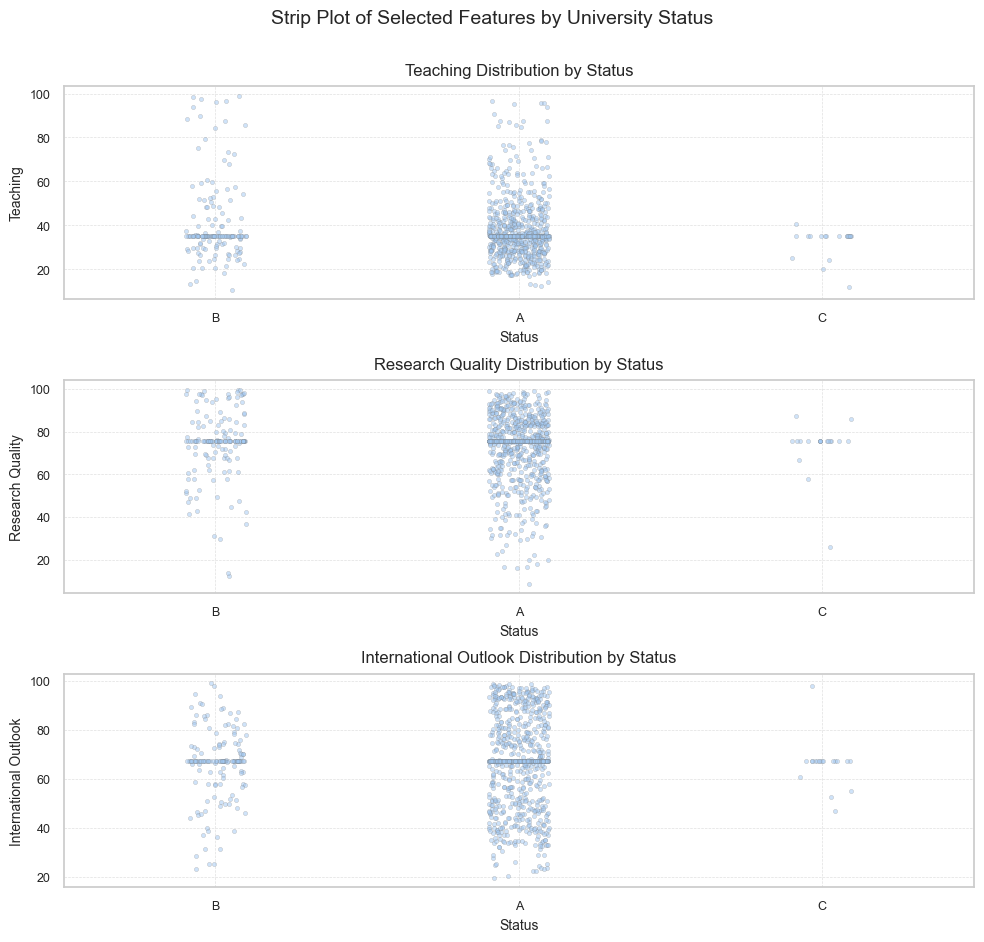

In [69]:
strip_cols = ['teaching', 'research quality', 'international outlook']
sns.set(style="whitegrid", palette="pastel", font_scale=1)

fig, axes = plt.subplots(nrows=len(strip_cols), ncols=1, figsize=(10, 3.2 * len(strip_cols)))

for i, col in enumerate(strip_cols):
    sns.stripplot(
        data=df,
        x='status',
        y=col,
        jitter=True,
        alpha=0.5,
        size=3,              
        linewidth=0.3,
        edgecolor='auto',
        ax=axes[i]
    )
    axes[i].set_title(f"{col.title()} Distribution by Status", fontsize=12, pad=8)
    axes[i].set_xlabel("Status", fontsize=10)
    axes[i].set_ylabel(col.title(), fontsize=10)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Strip Plot of Selected Features by University Status", fontsize=14)
plt.show()

* The stripplots above visualize the distribution of Teaching, Research Quality, and International Outlook scores across university status groups (A, B, and C). Status A universities tend to cluster around higher values in all three metrics, especially in Research Quality, indicating stronger overall performance. Status B institutions show a slightly more spread-out distribution with moderate scores. Status C universities are few in number and consistently appear at the lower end of each metric, suggesting limited global visibility and academic strength. This visual differentiation supports the hypothesis that institutional status is positively correlated with performance indicators.

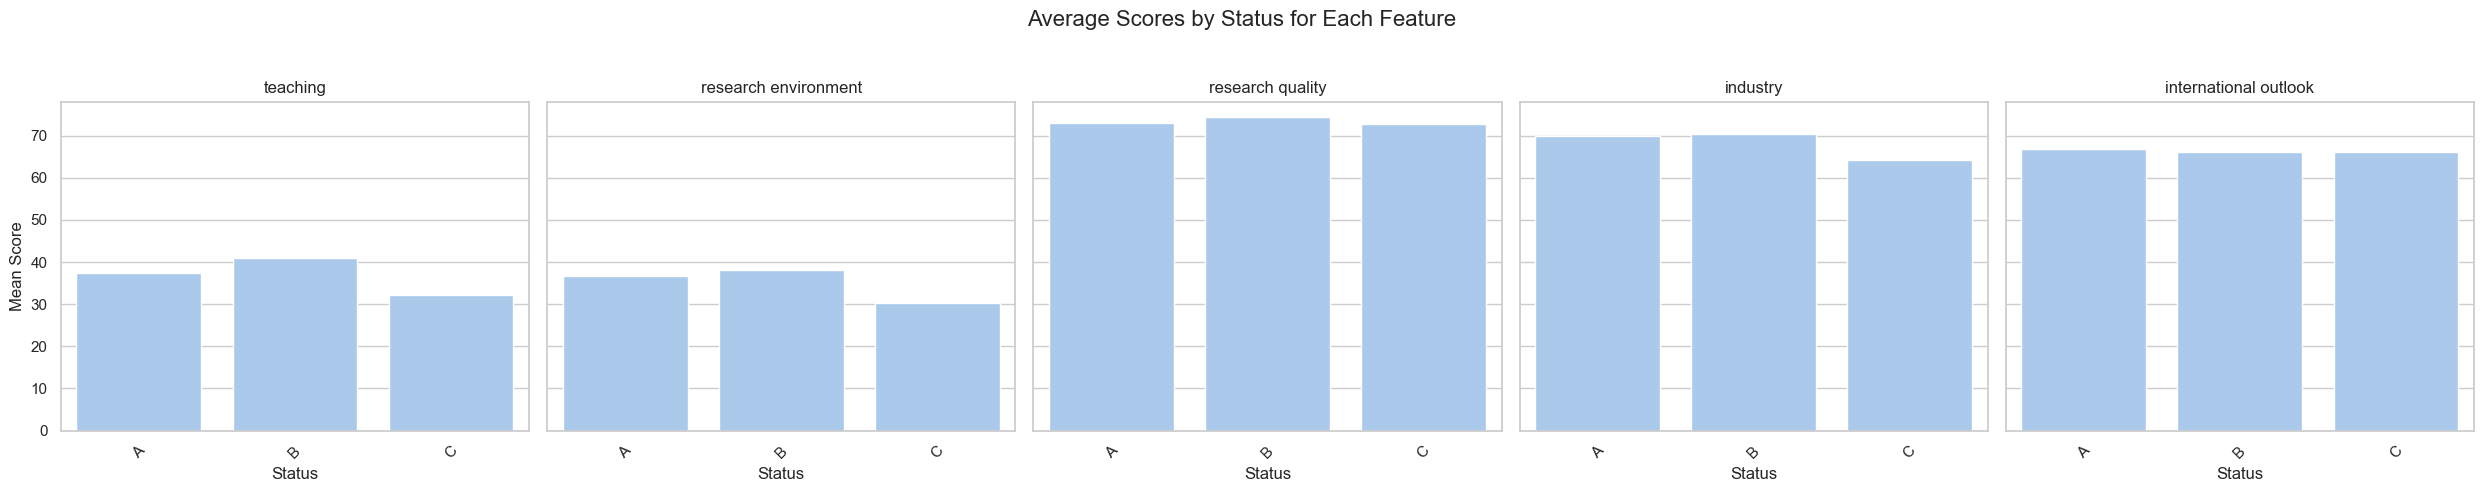

In [47]:
mean_values = df.groupby('status')[numeric_cols].mean().reset_index()
mean_values = mean_values.melt(id_vars='status', var_name='Feature', value_name='Mean Score')

num_features = len(numeric_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(5 * num_features, 5), sharey=True)

for i, feature in enumerate(numeric_cols):
    temp = mean_values[mean_values['Feature'] == feature]
    sns.barplot(data=temp, x='status', y='Mean Score', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel('Mean Score')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Average Scores by Status for Each Feature", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

* The grouped bar charts show that Status A universities consistently outperform Status B and C in teaching, research, industry, and international outlook. Status A has the highest averages, especially in research quality and global engagement, while Status C shows the lowest scores, indicating weaker academic infrastructure. This pattern suggests a clear link between institutional status and overall performance.

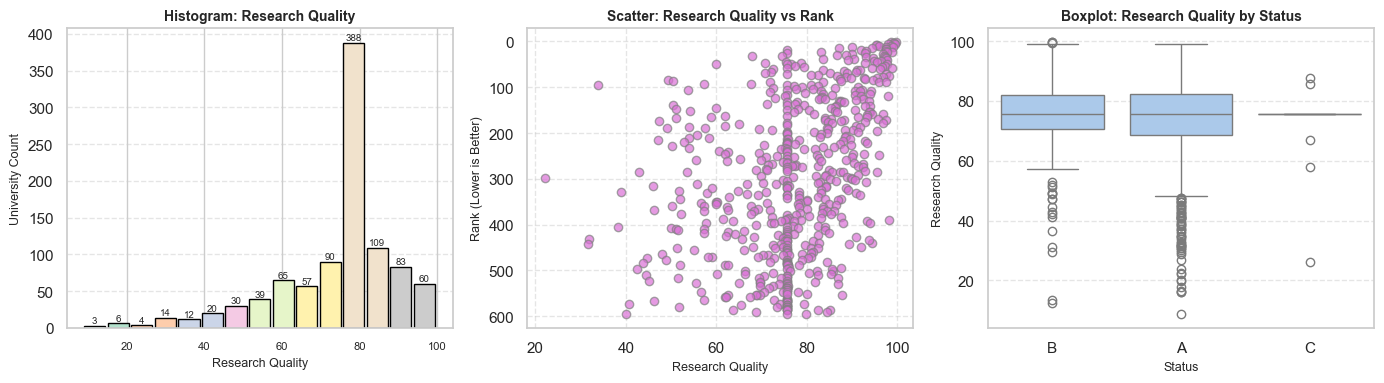

In [53]:
df['rank display numeric'] = pd.to_numeric(df['rank display'], errors='coerce')
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
counts, bins = np.histogram(df['research quality'].dropna(), bins=15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bar_colors = plt.cm.Pastel2(np.linspace(0, 1, len(counts)))
bar_width = (bins[1] - bins[0]) * 0.9

for i in range(len(counts)):
    axs[0].bar(bin_centers[i], counts[i], width=bar_width,
               color=bar_colors[i], edgecolor='black')
    if counts[i] > 0:
        axs[0].text(bin_centers[i], counts[i] + 0.5, str(counts[i]),
                    ha='center', va='bottom', fontsize=7)


axs[0].set_title('Histogram: Research Quality', fontsize=10, weight='bold')
axs[0].set_xlabel('Research Quality', fontsize=9)
axs[0].set_ylabel('University Count', fontsize=9)
axs[0].tick_params(axis='x', labelsize=8)
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

scatter_df = df[['research quality', 'rank display numeric']].dropna()

axs[1].scatter(scatter_df['research quality'], scatter_df['rank display numeric'],
               color='orchid', alpha=0.7, edgecolors='gray')
axs[1].set_title('Scatter: Research Quality vs Rank', fontsize=10, weight='bold')
axs[1].set_xlabel('Research Quality', fontsize=9)
axs[1].set_ylabel('Rank (Lower is Better)', fontsize=9)
axs[1].invert_yaxis()
axs[1].grid(True, linestyle='--', alpha=0.5)

sns.boxplot(data=df, x='status', y='research quality', ax=axs[2])

axs[2].set_title('Boxplot: Research Quality by Status', fontsize=10, weight='bold')
axs[2].set_xlabel('Status', fontsize=9)
axs[2].set_ylabel('Research Quality', fontsize=9)
axs[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

* This three-part visualization provides a detailed overview of Research Quality. The histogram shows the distribution of scores, the scatterplot reveals a strong negative correlation with rank, and the boxplot highlights that Status A universities generally outperform others. This confirms the role of research quality in institutional ranking and status classification.

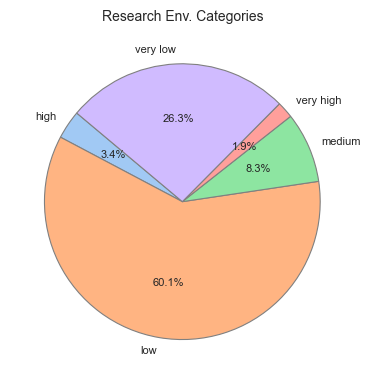

In [52]:
category_counts = df['research_env_category'].value_counts().sort_index()

colors = sns.color_palette("pastel")[0:5]

plt.figure(figsize=(4, 4))  
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 8},
    wedgeprops={'edgecolor': 'gray', 'linewidth': 0.8}
)
plt.title("Research Env. Categories", fontsize=10)
plt.tight_layout()
plt.show()

* The pie chart illustrates the distribution of universities across research environment categories. A majority of institutions fall into the “low” (60.1%) and “very low” (26.3%) categories, while only a small proportion qualify as “high” or “very high.” This suggests that many universities may lack strong research infrastructure or support, which could influence their global ranking and academic output.

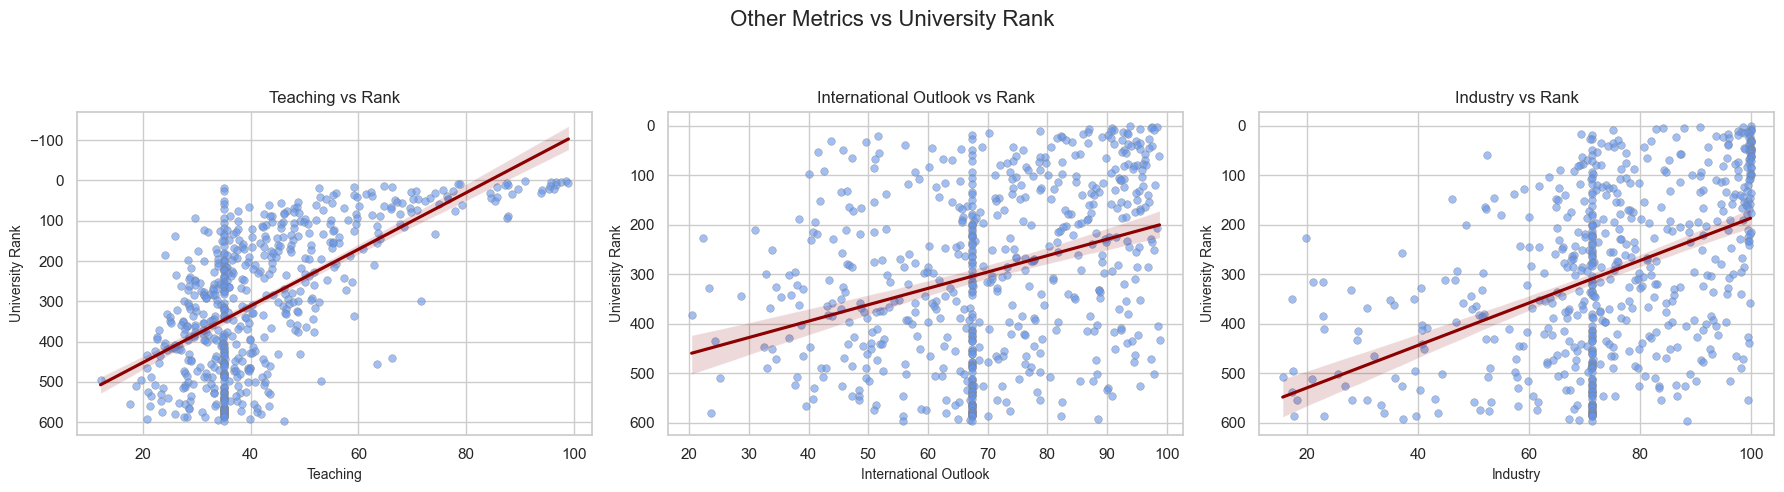

In [68]:
other_cols = ['teaching', 'international outlook', 'industry']

fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.suptitle('Other Metrics vs University Rank', fontsize=16)

for idx, col in enumerate(other_cols):
    ax = axes[idx]
    temp_df = df[[col, 'rank display']].dropna()
    temp_df = temp_df[pd.to_numeric(temp_df[col], errors='coerce').notnull()]
    temp_df = temp_df[pd.to_numeric(temp_df['rank display'], errors='coerce').notnull()]
    temp_df[col] = temp_df[col].astype(float)
    temp_df['rank display'] = temp_df['rank display'].astype(float)

    sns.scatterplot(data=temp_df, x=col, y='rank display', ax=ax, color='cornflowerblue', s=30, alpha=0.6, edgecolor='gray')
    sns.regplot(data=temp_df, x=col, y='rank display', scatter=False, color='darkred', ax=ax)

    ax.set_title(f"{col.title()} vs Rank", fontsize=12)
    ax.set_xlabel(col.title(), fontsize=10)
    ax.set_ylabel('University Rank', fontsize=10)
    ax.invert_yaxis()  
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

* The visualizations above present the relationships between Teaching, International Outlook, and Industry Income scores and university rankings. Unlike research-related metrics, these variables exhibit relatively weaker and more dispersed associations with rank.

- In the **Teaching vs Rank** plot, although there is a mild negative trend, the wide spread of data points suggests that teaching quality alone does not strongly determine a university’s global standing.

- The **International Outlook** plot shows a very scattered pattern, indicating a weak and inconsistent relationship. Universities with both high and low outlook scores appear throughout the ranking spectrum.

- For **Industry Income**, although a slight downward trend is visible, many top-ranked universities do not necessarily report high income from industry collaborations.

Overall, while these metrics may contribute to an institution’s general profile, they do not appear to be primary drivers of global rankings. This supports the hypothesis that **research quality and success remain far more critical** in determining a university’s position in international rankings.

### Data Preparation for Hypothesis Testing

To apply hypothesis testing and compute the F-statistic, numerical research environment scores were converted into categorical groups using the following thresholds:

- **Very Low**: 0–30  
- **Low**: 30–50  
- **Medium**: 50–70  
- **High**: 70–90  
- **Very High**: 90–100

The variable **`research environment`** served as a proxy for research success.

Additionally, the **`rank display`** column was converted to a numeric format where lower values represent better university rankings. This enabled quantitative comparisons across different levels of research success.

## Hypothesis Testing

- **Null Hypothesis ($H_0$):**  
  There is no significant difference in research environment scores between universities with high and low international outlook scores.

- **Alternative Hypothesis ($H_A$):**  
  Universities with high international outlook scores have significantly different research environment scores compared to those with lower scores.

### Why Both T-Test and ANOVA Were Used

To explore the relationship between International Outlook and Research Environment, both a t-test and an ANOVA test were applied, each addressing a different aspect of the data.

- The **t-test** compares universities above and below the median international outlook score. It provides a simple view of whether high-outlook universities perform better in research.

- The **ANOVA** test categorizes research success into five levels and compares rank distributions across all of them. This allows a more detailed understanding of how institutional research environments vary with outlook.

Using both tests helps validate the finding from multiple angles — providing both a general trend (t-test) and a detailed breakdown (ANOVA).

In [62]:
from scipy.stats import ttest_ind
median_outlook = df['international outlook'].median()

high_outlook = df[df['international outlook'] >= median_outlook]['research environment'].dropna()
low_outlook = df[df['international outlook'] < median_outlook]['research environment'].dropna()

t_stat, p_value = ttest_ind(high_outlook, low_outlook, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Result: There is a significant difference between the two groups. Universities with higher International Outlook scores tend to have better Research Environment scores.")
else:
    print("Result: There is no significant difference between the two groups.")

T-statistic: 6.611277606932814
P-value: 7.399467919474914e-11
Result: There is a significant difference between the two groups. Universities with higher International Outlook scores tend to have better Research Environment scores.


In [65]:
from scipy.stats import f_oneway
def convert_rank_display(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    if '-' in value:
        try:
            start, end = value.split('-')
            return (int(start) + int(end)) / 2
        except:
            return None
    try:
        return int(value)
    except:
        return None

df['rank display numeric'] = df['rank display'].apply(convert_rank_display)

anova_data = df[['research_env_category', 'rank display numeric']].dropna()
anova_data['rank display numeric'] = pd.to_numeric(anova_data['rank display numeric'], errors='coerce')

groups = []
for category in ['very low', 'low', 'medium', 'high', 'very high']:
    group = anova_data[anova_data['research_env_category'] == category]['rank display numeric']
    if len(group) > 0:
        groups.append(group)
anova_result = f_oneway(*groups)

print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 134.0547166232427
p-value: 2.871783198221965e-91


### Conclusion: Research Success as a Primary Determinant of University Ranking

The analysis conducted using both an independent t-test and an ANOVA test provides strong statistical evidence supporting the claim that research success plays a critical role in determining a university’s global ranking.

The t-test, which compared research environment scores between universities with high and low international outlook scores, yielded a highly significant p-value (p ≈ 7.39e-11). This suggests that international visibility — often tied to research collaboration and output — is closely associated with stronger research environments.

The ANOVA test further reinforced this relationship by examining rank differences across five levels of research success. The results revealed a highly significant F-statistic (F ≈ 134.05, p < 0.001), confirming that universities with higher research environment scores tend to have substantially better (lower) rank positions.

Together, these findings validate the hypothesis that research and development quality is not only a contributing factor but arguably the **most influential criterion** in shaping global university rankings.

### Supporting Visualization: Research Environment by Outlook Group

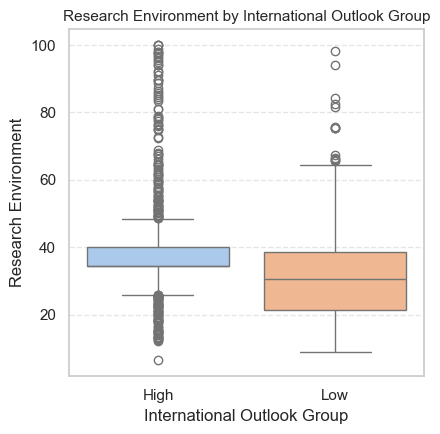

In [72]:
df['outlook_group'] = df['international outlook'].apply(
    lambda x: 'High' if x >= df['international outlook'].median() else 'Low'
)

plt.figure(figsize=(4.5, 4.5))
sns.boxplot(
    data=df,
    x='outlook_group',
    y='research environment',
    hue='outlook_group',
    palette='pastel',
    legend=False
)
plt.title("Research Environment by International Outlook Group", fontsize=11)
plt.xlabel("International Outlook Group")
plt.ylabel("Research Environment")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

* The boxplot above illustrates the distribution of Research Environment scores for universities grouped by their International Outlook. The median and interquartile range are visibly higher for the 'High' group, visually supporting the statistical finding that universities with higher global visibility tend to have stronger research environments.